# 1. Risk and return recap
## Portfolio returns during the crisis
The first step in quantifying the effects of uncertainty on a financial portfolio is to examine the portfolio's return. You'll consider a portfolio of four investment bank stocks, which were both instigators and victims of the global financial crisis.

The banks are Citibank, Goldman Sachs, J.P. Morgan, and Morgan Stanley. Closing stock prices for the period 2005 - 2010 are in the available portfolio DataFrame. You'll use this to examine the dramatic price changes during the depths of the crisis, 2008 - 2009. You'll also see how volatile the resulting portfolio_returns were, assuming an equal-weighted portfolio with weights stored in the weights list.

In this and in all future exercises, numpy, pandas and matplotlib.pyplot are available as np, pd, and plt respectively.

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [76]:
while 'DATABASE' not in os.listdir():
    
    os.chdir('..')

In [77]:
portfolio = pd.read_csv('DATABASE/portfolio.csv')\
.set_index('date')
portfolio

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,101.1385,308.52,78.450,524.81,49.8485
2015-01-05,98.2893,302.19,77.190,513.87,47.3114
2015-01-06,98.2985,295.29,76.150,501.96,46.5014
2015-01-07,99.6769,298.42,76.150,501.10,46.7428
2015-01-08,103.5067,300.46,78.175,502.68,47.7792
...,...,...,...,...,...
2019-03-25,188.0160,1774.26,166.290,1193.00,366.2300
2019-03-26,186.0735,1783.76,167.680,1184.62,359.9700
2019-03-27,187.7470,1765.70,165.870,1173.02,353.3700


In [78]:
# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = portfolio.loc['2015-01-01':'2019-01-31',:]

asset_prices = asset_prices.iloc[:,:4]
asset_prices

,AAPL,AMZN,FB,GOOG
date,,,,
2015-01-02,101.1385,308.52,78.450,524.81
2015-01-05,98.2893,302.19,77.190,513.87
2015-01-06,98.2985,295.29,76.150,501.96
2015-01-07,99.6769,298.42,76.150,501.10
2015-01-08,103.5067,300.46,78.175,502.68
...,...,...,...,...
2019-01-25,156.4836,1670.57,149.010,1090.99
2019-01-28,155.0354,1637.89,147.470,1070.08
2019-01-29,153.4285,1593.88,144.190,1060.62


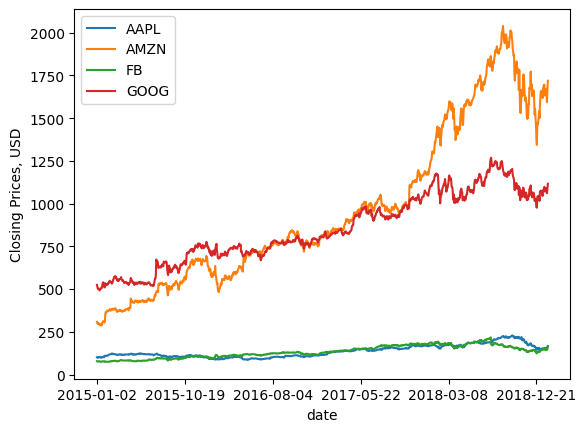

In [79]:
# Plot portfolio's asset prices during this time
asset_prices.plot().set_ylabel("Closing Prices, USD")
plt.show()

In [80]:
weights =[0.25, 0.25, 0.25, 0.25]

In [81]:
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
asset_returns

,AAPL,AMZN,FB,GOOG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.020517,-0.016061,-0.020846
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177
2015-01-07,0.014023,0.010600,0.000000,-0.001713
2015-01-08,0.038422,0.006836,0.026592,0.003153
...,...,...,...,...
2019-01-25,0.033136,0.009451,0.021806,0.015914
2019-01-28,-0.009255,-0.019562,-0.010335,-0.019166
2019-01-29,-0.010365,-0.026870,-0.022242,-0.008840


In [82]:
for col in asset_returns.columns: 
    asset_returns.col = asset_returns[col]*0.5
    

/tmp/ipykernel_10696/1614398125.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  asset_returns.col = asset_returns[col]*0.5


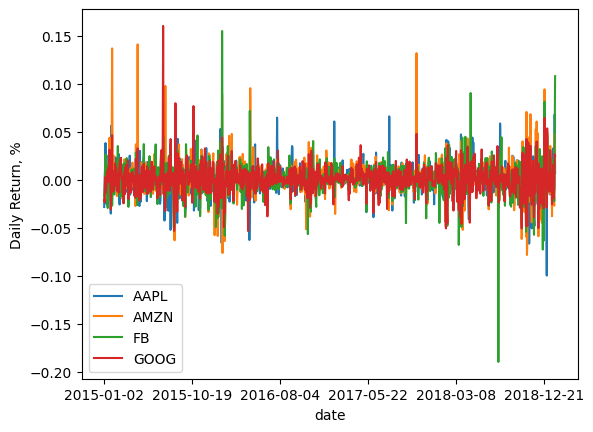

In [83]:
#portfolio_returns = asset_returns.dot(weights)
portfolio_returns = asset_returns
# Plot portfolio returns 
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

**The asset prices plot shows how the global financial crisis created a loss in confidence in investment banks from September 2008. There was an event during September that precipitated this decline, and you'll examine this shortly. The 'spikiness' of portfolio returns indicates how uncertain and volatile asset returns became. You'll quantify this volatility using the same dataset in the next exercise.**

### Asset covariance and portfolio volatility
Now that you've examined the return of the portfolio of investment banks, it's time to assess the riskiness of the portfolio using the covariance matrix to determine the portfolio's volatility.

First you'll compute the covariance between the asset_returns and identify which of the banks had the highest volatility during the 2008-2009 crisis period.

Then, given the weights of an equal-weighted portfolio, you'll find the portfolio's annualized volatility for that period using portfolio_returns.

Finally, you'll use a 30-day window to create a time series of the volatility, and visualize this with a plot.

In [84]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252
covariance = pd.DataFrame(covariance)
# Display the covariance matrix
print(covariance)

          AAPL      AMZN        FB      GOOG
AAPL  0.064067  0.038116  0.033751  0.031815
AMZN  0.038116  0.094965  0.050769  0.049050
FB    0.033751  0.050769  0.083797  0.042720
GOOG  0.031815  0.049050  0.042720  0.058293


In [85]:
# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance = np.transpose(weights) @ covariance @ weights
portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

0.22270528335440454


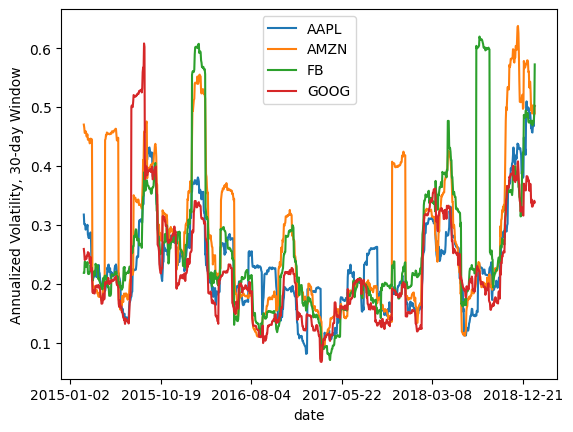

In [86]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

## Risk factors and the financial crisis
### Frequency resampling primer
Risk factor models often rely upon data that is of different frequencies. A typical example is when using quarterly macroeconomic data, such as prices, unemployment rates, etc., with financial data, which is often daily (or even intra-daily). To use both data sources in the same model, higher frequency data needs to be resampled to match the lower frequency data.

The DataFrame and Series Pandas objects have a built-in .resample() method that specifies the lower frequency. This method is chained with a method to create the lower-frequency statistic, such as .mean() for the average of the data within the new frequency period, or .min() for the minimum of the data.

In this exercise you'll practice converting daily returns data to weekly and quarterly frequency.

In [87]:
sp500 = pd.DataFrame(pd.read_csv('DATABASE/sp500.csv'))\
.set_index('date')
sp500.index=pd.to_datetime(sp500.index)
sp500

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2019-03-13,2810.919922
2019-03-14,2808.479980
2019-03-15,2822.479980


In [88]:
sp500['return'] = sp500.pct_change()
returns = sp500['return']



In [89]:
returns = pd.Series(returns)
type(returns)

pandas.core.series.Series

In [90]:
# Convert daily returns to quarterly average returns
returns_q = returns.resample('Q').mean()

# Examine the beginning of the quarterly series
print(returns_q.head())

date
2015-03-31    0.000118
2015-06-30   -0.000017
2015-09-30   -0.001036
2015-12-31    0.001021
2016-03-31    0.000193
Freq: Q-DEC, Name: return, dtype: float64


In [91]:
# Now convert daily returns to weekly minimum returns
returns_w = returns.resample('W').min()

# Examine the beginning of the weekly series
print(returns_w.head())

date
2015-01-04         NaN
2015-01-11   -0.018278
2015-01-18   -0.009248
2015-01-25   -0.005492
2015-02-01   -0.013496
Freq: W-SUN, Name: return, dtype: float64


**Rsampling is an oft-overlooked but extremely important tool for time series and risk factor analysis, and we'll use it in the following exercise.**

### Visualizing risk factor correlation
Investment banks heavily invested in mortgage-backed securities (MBS) before and during the financial crisis. This makes MBS a likely risk factor for the investment bank portfolio. You'll assess this using scatterplots between portfolio returns and an MBS risk measure, the 90-day mortgage delinquency rate mort_del.

mort_del is only available as quarterly data. So portfolio_returns first needs to be transformed from daily to quarterly frequency using the DataFrame .resample() method.

Your workspace contains both portfolio_returns for an equal-weighted portfolio and the delinquency rate mort_del variable. For the scatterplots, plot_average and plot_min are plot axes in your workspace--you'll add your scatterplots to them using the .scatter() method.

In [92]:
# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average = returns.resample('Q').mean().dropna()

# Create a scatterplot between delinquency and quarterly average returns
#plot_average.scatter(mort_del, portfolio_q_average)

portfolio_q_average

date
2015-03-31    0.000118
2015-06-30   -0.000017
2015-09-30   -0.001036
2015-12-31    0.001021
2016-03-31    0.000193
2016-06-30    0.000331
2016-09-30    0.000527
2016-12-31    0.000523
2017-03-31    0.000878
2017-06-30    0.000413
2017-09-30    0.000626
2017-12-31    0.000950
2018-03-31   -0.000124
2018-06-30    0.000483
2018-09-30    0.001114
2018-12-31   -0.002276
2019-03-31    0.002343
Freq: Q-DEC, Name: return, dtype: float64

### Least-squares factor model
As you've seen, there is a negative correlation between minimum quarterly returns and mortgage delinquency rates from 2005 - 2010. This can be made more precise with an OLS regression factor model.

You'll compare three factor models with three different quarterly dependent variables: average returns, minimum returns, and average volatility. The independent variable is the mortgage delinquency rate. In the regression summary, examine the coefficients' t-statistic for statistical significance, as well as the overall R-squared for goodness of fit.

The statsmodels.api library is available as sm.

In [93]:
from ANALYSIS.f_functions.generate_random_deliquency_data import generate_random_data

mort_del = generate_random_data()
mort_del

,Mortgage Delinquency Rate
date,
2014-09-24,14
2014-09-25,6
2014-09-26,92
2014-09-27,61
2014-09-28,2
...,...
2014-12-28,52
2014-12-29,82
2014-12-30,73


In [94]:
port_q_mean = generate_random_data()
port_q_mean

,Mortgage Delinquency Rate
date,
2014-09-24,40
2014-09-25,85
2014-09-26,99
2014-09-27,4
2014-09-28,86
...,...
2014-12-28,4
2014-12-29,34
2014-12-30,59


In [95]:
#from statsmodels.api import add_constant
#import statsmodels.api as sm
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]


scipy.signal.signaltools._centered = _centered



import statsmodels.api as sm

# Add a constant to the regression
#mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Mortgage Delinquency Rate   R-squared (uncentered):                   0.528
Model:                                   OLS   Adj. R-squared (uncentered):              0.523
Method:                        Least Squares   F-statistic:                              110.7
Date:                       Wed, 24 Aug 2022   Prob (F-statistic):                    7.94e-18
Time:                               18:36:02   Log-Likelihood:                         -503.58
No. Observations:                        100   AIC:                                      1009.
Df Residuals:                             99   BIC:                                      1012.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                                coef    std err   

Next regress minimum returns, port_q_min, against mort_del with the .OLS() and .fit() methods.

In [96]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)


#EN si va el port_q_min pero no lo tenemos
# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     Mortgage Delinquency Rate   R-squared:                       0.005
Model:                                   OLS   Adj. R-squared:                 -0.005
Method:                        Least Squares   F-statistic:                    0.4948
Date:                       Wed, 24 Aug 2022   Prob (F-statistic):              0.483
Time:                               18:36:02   Log-Likelihood:                -477.72
No. Observations:                        100   AIC:                             959.4
Df Residuals:                             98   BIC:                             964.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------


## Modern portfolio theory

### Practice with PyPortfolioOpt: returns
Modern Portfolio Theory is the cornerstone of portfolio risk management, because the efficient frontier is a standard method of assessing both investor risk appetite and market risk-return tradeoffs. In this exercise you'll develop powerful tools to explore a portfolio's efficient frontier, using the PyPortfolioOpt pypfopt Python library.

To compute the efficient frontier, both expected returns and the covariance matrix of the portfolio are required.

After some practice loading the investment bank price data, you'll use pypfopt.expected_returns's mean_historical_return method to compute and visualize the annualized average returns of each bank from daily asset prices. The following exercise will then cover the covariance matrix.

In [97]:
pd.read_csv("DATABASE/portfolio.csv")\
.set_index('date')

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,101.1385,308.52,78.450,524.81,49.8485
2015-01-05,98.2893,302.19,77.190,513.87,47.3114
2015-01-06,98.2985,295.29,76.150,501.96,46.5014
2015-01-07,99.6769,298.42,76.150,501.10,46.7428
2015-01-08,103.5067,300.46,78.175,502.68,47.7792
...,...,...,...,...,...
2019-03-25,188.0160,1774.26,166.290,1193.00,366.2300
2019-03-26,186.0735,1783.76,167.680,1184.62,359.9700
2019-03-27,187.7470,1765.70,165.870,1173.02,353.3700


In [98]:
# Load the investment portfolio price data into the price variable.
from datetime import datetime as dt

dtm = lambda x: dt.strptime(str(x), "%d.%m.%Y")


prices = pd.read_csv("DATABASE/portfolio.csv", dayfirst=True, parse_dates=True, date_parser=dtm)\
.rename(columns = {'date':'Date'})

#prices["Date"] = prices["Date"].apply(dtm)
prices

,Date,AAPL,AMZN,FB,GOOG,NFLX
0,2015-01-02,101.1385,308.52,78.450,524.81,49.8485
1,2015-01-05,98.2893,302.19,77.190,513.87,47.3114
2,2015-01-06,98.2985,295.29,76.150,501.96,46.5014
3,2015-01-07,99.6769,298.42,76.150,501.10,46.7428
4,2015-01-08,103.5067,300.46,78.175,502.68,47.7792
...,...,...,...,...,...,...
1062,2019-03-25,188.0160,1774.26,166.290,1193.00,366.2300
1063,2019-03-26,186.0735,1783.76,167.680,1184.62,359.9700
1064,2019-03-27,187.7470,1765.70,165.870,1173.02,353.3700
1065,2019-03-28,187.9961,1773.42,165.550,1168.49,354.6100


In [99]:
# Convert the 'Date' column to a datetime index
prices['Date'] = pd.to_datetime(prices['Date'])
prices.set_index(['Date'], inplace = True)

prices

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2015-01-02,101.1385,308.52,78.450,524.81,49.8485
2015-01-05,98.2893,302.19,77.190,513.87,47.3114
2015-01-06,98.2985,295.29,76.150,501.96,46.5014
2015-01-07,99.6769,298.42,76.150,501.10,46.7428
2015-01-08,103.5067,300.46,78.175,502.68,47.7792
...,...,...,...,...,...
2019-03-25,188.0160,1774.26,166.290,1193.00,366.2300
2019-03-26,186.0735,1783.76,167.680,1184.62,359.9700
2019-03-27,187.7470,1765.70,165.870,1173.02,353.3700


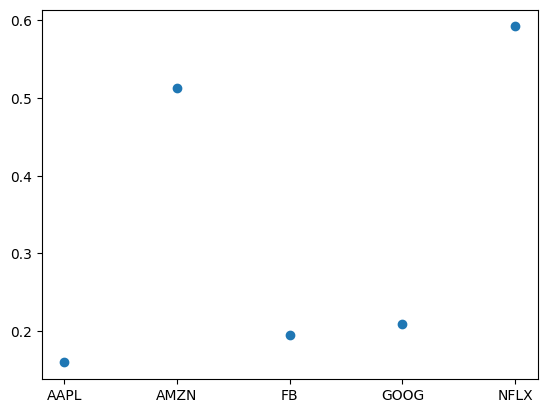

In [100]:
 
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(prices, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

**The average historical return is usually available as a proxy for expected returns, but is not always accurate--a more thorough estimate of expected returns requires an assumption about the return distribution, which we'll discuss in the context of Loss Distributions later in the course.**

### Practice with PyPortfolioOpt: covariance
Portfolio optimization relies upon an unbiased and efficient estimate of asset covariance. Although sample covariance is unbiased, it is not efficient--extreme events tend to be overweighted.

One approach to alleviate this is through "covariance shrinkage", where large errors are reduced ('shrunk') to improve efficiency. In this exercise, you'll use pypfopt.risk_models's CovarianceShrinkage object to transform sample covariance into an efficient estimate. The textbook error shrinkage method, .ledoit_wolf(), is a method of this object.

Asset prices are available in your workspace. Note that although the CovarianceShrinkage object takes prices as input, it actually calculates the covariance matrix of asset returns, not prices.

In [101]:
# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(prices)



In [102]:
# Compute the sample covariance matrix of returns
sample_cov = prices.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")


Sample Covariance Matrix
           AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.063118  0.037599  0.032926  0.031483  0.039957
AMZN  0.037599  0.093749  0.049486  0.048395  0.063560
FB    0.032926  0.049486  0.082483  0.041922  0.049808
GOOG  0.031483  0.048395  0.041922  0.057460  0.049559
NFLX  0.039957  0.063560  0.049808  0.049559  0.185543 



In [103]:
print("Efficient Covariance Matrix\n", e_cov, "\n")

Efficient Covariance Matrix
           AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.063731  0.036806  0.032231  0.030819  0.039114
AMZN  0.036806  0.093716  0.048442  0.047374  0.062219
FB    0.032231  0.048442  0.082688  0.041038  0.048757
GOOG  0.030819  0.047374  0.041038  0.058192  0.048513
NFLX  0.039114  0.062219  0.048757  0.048513  0.183573 



***Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) may seem small, they have a huge impact on estimation of the optimal portfolio weights and the generation of the efficient frontier. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.***

### Breaking down the financial crisis
In the video you saw the efficient frontier for the portfolio of investment banks over the entire period 2005 - 2010, which includes time before, during and after the global financial crisis.

Here you'll break down this period into three sub-periods, or epochs: 2005-2006 (before), 2007-2008 (during) and 2009-2010 (after). For each period you'll compute the efficient covariance matrix, and compare them to each other.

The portfolio's prices for 2005 - 2010 are available in your workspace, as is the CovarianceShrinkage object from PyPortfolioOpt.

In [104]:
prices = prices.iloc[:,:4]
#prices = prices.pct_change()
prices

,AAPL,AMZN,FB,GOOG
Date,,,,
2015-01-02,101.1385,308.52,78.450,524.81
2015-01-05,98.2893,302.19,77.190,513.87
2015-01-06,98.2985,295.29,76.150,501.96
2015-01-07,99.6769,298.42,76.150,501.10
2015-01-08,103.5067,300.46,78.175,502.68
...,...,...,...,...
2019-03-25,188.0160,1774.26,166.290,1193.00
2019-03-26,186.0735,1783.76,167.680,1184.62
2019-03-27,187.7470,1765.70,165.870,1173.02


In [105]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '2-1-2015', 'end': '31-12-2016'},
           'during' : {'start': '1-1-2017', 'end': '31-12-2018'},
           'after'  : {'start': '1-1-2019', 'end': '31-12-2021'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
    sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
    
    sub_price
    e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices \n", e_cov)

Efficient Covariance Matrices 
 {'before':           AAPL      AMZN        FB      GOOG
AAPL  0.060380  0.026788  0.027282  0.024789
AMZN  0.026788  0.090589  0.045710  0.040976
FB    0.027282  0.045710  0.073489  0.038316
GOOG  0.024789  0.040976  0.038316  0.063227, 'during':           AAPL      AMZN        FB      GOOG
AAPL  0.058517  0.042029  0.031523  0.032789
AMZN  0.042029  0.086296  0.049176  0.046721
FB    0.031523  0.049176  0.086320  0.040801
GOOG  0.032789  0.046721  0.040801  0.052193, 'after':           AAPL      AMZN        FB      GOOG
AAPL  0.104392  0.048404  0.040474  0.043141
AMZN  0.048404  0.091250  0.043745  0.044263
FB    0.040474  0.043745  0.111204  0.040325
GOOG  0.043141  0.044263  0.040325  0.064243}


/home/bluetab/Escritorio/Github/virtual_envs/finance/lib/python3.9/site-packages/pandas/core/indexing.py:1214: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
/home/bluetab/Escritorio/Github/virtual_envs/finance/lib/python3.9/site-packages/pandas/core/indexes/base.py:6393: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)
/home/bluetab/Escritorio/Github/virtual_envs/finance/lib/python3.9/site-packages/pandas/core/indexing.py:1214: UserWarning: Parsing '31-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
/home/bluetab/Escritorio/Github/virtual_envs/fin

***The breakdown of the 2005 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis, and this changed the risk-return trade-off after the crisis. For future reference, also note that although we used a loop in this exercise, a dictionary comprehension could also have been used to create the efficient covariance matrix.***

### The efficient frontier and the financial crisis
Previously you examined the covariance matrix of the investment bank portfolio before, during and after the financial crisis. Now you will visualize the changes that took place in the efficient frontier, showing how the crisis created a much higher baseline risk for any given return.

Using the PyPortfolioOpt pypfopt library's Critical Line Algorithm (CLA) object, you will derive and visualize the efficient frontier during the crisis period, and add it to a scatterplot already displaying the efficient frontiers before and after the crisis.

Expected returns returns_during and the efficient covariance matrix ecov_during are available, as is the CLA object from pypfopt. (Remember that DataCamp plots can be expanded to their own window, which can increase readability.)

In [106]:
e_cov = {}
return_s = {}
for x in epochs.keys():
    
    #rint(x)
    
    sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
    
    
    
    
   
    e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
    
    return_s[x] =sub_price
    

/home/bluetab/Escritorio/Github/virtual_envs/finance/lib/python3.9/site-packages/pandas/core/indexing.py:1214: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
/home/bluetab/Escritorio/Github/virtual_envs/finance/lib/python3.9/site-packages/pandas/core/indexes/base.py:6393: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)
/home/bluetab/Escritorio/Github/virtual_envs/finance/lib/python3.9/site-packages/pandas/core/indexing.py:1214: UserWarning: Parsing '31-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
/home/bluetab/Escritorio/Github/virtual_envs/fin

#### before

In [107]:
ecov_during = e_cov['during']
returns_during =return_s['during']

In [108]:
returns_during = np.mean(returns_during, axis = 0)
from pypfopt.cla import CLA

# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(returns_during, ecov_during)

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

OrderedDict([('AAPL', 0.40104031889443265), ('AMZN', 0.0), ('FB', 0.1288154913608571), ('GOOG', 0.47014418974471006)])


In [109]:
ecov_after = e_cov['after']
returns_after =return_s['after']

returns_after = np.mean(returns_after, axis = 0)
# Initialize the Crtical Line Algorithm object
efficient_portfolio_after = CLA(returns_after, ecov_after)


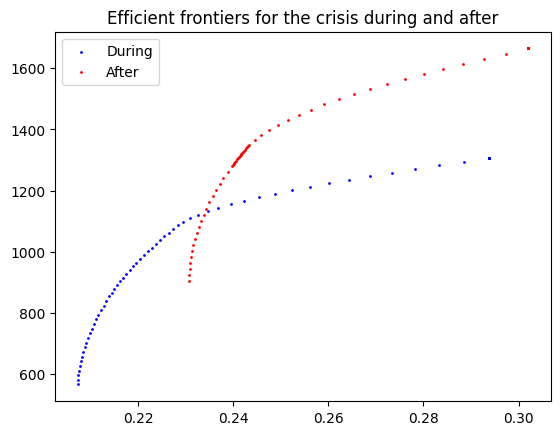

In [110]:

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()
(ret_after, vol_after, weights_after) = efficient_portfolio_after.efficient_frontier()
# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'b', marker = '.', label = 'During')
plt.scatter(vol_after, ret_after, s = 4, c = 'r', marker = '.', label = 'After')
plt.legend()
plt.title('Efficient frontiers for the crisis during and after')
plt.show()

**atención no tiene mucho sentido porque los datos son metira, pero en el cursillo sale bien**